# Bank Loan Analysis Report

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [3]:
df = pd.read_excel("C:/Users/Biswarup Das/Downloads/financial_loan_data_excel.xlsx")

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


## Metadata Of Data

In [5]:
print("No. Of Rows = ",df.shape[0])

No. Of Rows =  38576


In [6]:
print("No. Of Columns = ",df.shape[1])

No. Of Columns =  24


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [8]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


In [9]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

## Total Loan Applications

In [10]:
TLA = df['id'].count()
print("Total Loan Applications = ",TLA)

Total Loan Applications =  38576


## MTD Total Loan Applications

In [11]:
Latest_Issue_Date = df['issue_date'].max()
Latest_Month = Latest_Issue_Date.month
Latest_Year = Latest_Issue_Date.year
MTD_Data = df[(df['issue_date'].dt.month == Latest_Month) & (df['issue_date'].dt.year == Latest_Year)]
MTD_TLA = MTD_Data['id'].count()
print(f"MTD Total Loan Application(for {Latest_Issue_Date.strftime('%B %Y')}): {MTD_TLA}")

MTD Total Loan Application(for December 2021): 4314


## Total Funded Amount

In [12]:
TFA = df['loan_amount'].sum()
print("Total Funded Amount = ",TFA)

Total Funded Amount =  435757075


## MTD Total Funded Amount

In [13]:
MTD_TFA = MTD_Data['loan_amount'].sum()
print(f"MTD Total Funded Amount(for {Latest_Issue_Date.strftime('%B %Y')}): {MTD_TFA}")

MTD Total Funded Amount(for December 2021): 53981425


 ## Total Amount Received

In [14]:
TAR = df['total_payment'].sum()
print("Total Amount Received = ",TAR)

Total Amount Received =  473070933


## MTD Total Amount Received

In [15]:
MTD_TAR = MTD_Data['total_payment'].sum()
print(f"MTD Total Amount Received(for {Latest_Issue_Date.strftime('%B %Y')}): {MTD_TAR}")

MTD Total Amount Received(for December 2021): 58074380


## Average Interest Rate

In [18]:
AIR = df['int_rate'].mean()*100
print("Average Interest Rate = {:.2f}%".format(AIR))

Average Interest Rate = 12.05%


## Average Debt-to-Income Ratio

In [20]:
ADIR = df['dti'].mean()*100
print("Average Debt-to-Income Ratio = {:.2f}%".format(ADIR))

Average Debt-to-Income Ratio = 13.33%


## Good Loan Metrics

In [7]:
GL = df[df['loan_status'].isin(["Fully Paid","Current"])]
Good_Loan_Application = GL['id'].count()
Total_Loan_Application = df['id'].count()
Good_Loan_Application_Percentage = ((Good_Loan_Application/Total_Loan_Application)*100)
Good_Loan_Funded_Amount = GL['loan_amount'].sum()
Good_Loan_Recived_Amount = GL['total_payment'].sum()
print("Good Loan Application = ",Good_Loan_Application)
print("Total Loan Application = ",Total_Loan_Application)
print("Good Loan Application Percentage = {:.2f}%".format(Good_Loan_Application_Percentage))
print("Good Loan Funded Amount = ",Good_Loan_Funded_Amount)
print("Good Loan Recived Amount = ",Good_Loan_Recived_Amount)

Good Loan Application =  33243
Total Loan Application =  38576
Good Loan Application Percentage = 86.18%
Good Loan Funded Amount =  370224850
Good Loan Recived Amount =  435786170


## Bad Loan Metrics

In [12]:
 BL = df[df['loan_status']=="Charged Off"]
Bad_Loan_Application = BL['id'].count()
Total_Loan_Application = df['id'].count()
Bad_Loan_Application_Percentage = ((Bad_Loan_Application/Total_Loan_Application)*100)
Bad_Loan_Funded_Amount = BL['loan_amount'].sum()
Bad_Loan_Received_Amount = BL['total_payment'].sum()
print("Bad Loan Application = ",Bad_Loan_Application)
print("Total Loan Application = ",Total_Loan_Application)
print("Bad Loan Application Percentage = {:.2f}%".format(Bad_Loan_Application_Percentage))
print("Bad Loan Funded Amount = ",Bad_Loan_Funded_Amount)
print("Bad Loan Received Amount = ",Bad_Loan_Received_Amount)

Bad Loan Application =  5333
Total Loan Application =  38576
Bad Loan Application Percentage = 13.82%
Bad Loan Funded Amount =  65532225
Bad Loan Received Amount =  37284763


## Monthly Trends by Issue Date for Total Funded Amount

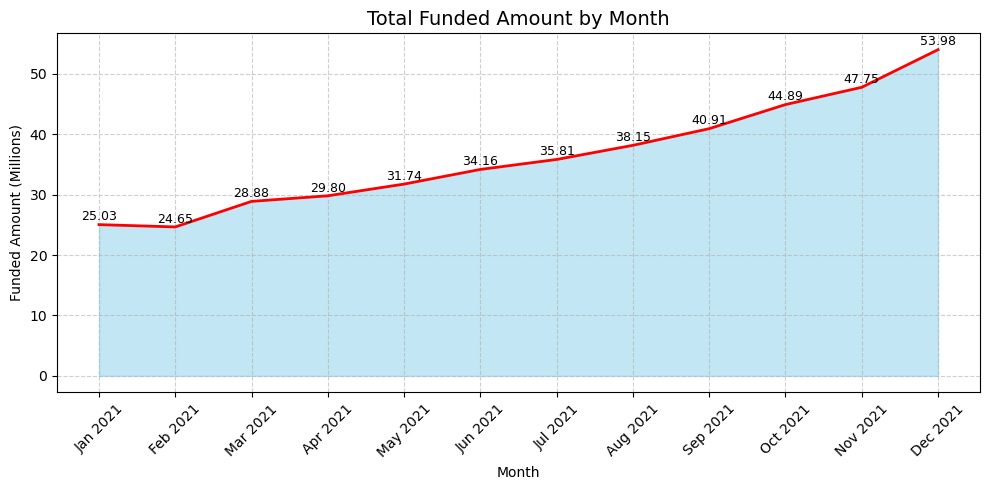

In [9]:
Monthly_Funded_Amount = (df.sort_values('issue_date').assign(month_year=lambda x: x['issue_date'].dt.strftime('%b %Y'))
                         .groupby('month_year',sort=False)['loan_amount'].sum().div(1000000).reset_index(name='funded_amount'))

plt.figure(figsize=(10,5))
plt.fill_between(Monthly_Funded_Amount['month_year'],Monthly_Funded_Amount['funded_amount'],color='skyblue',alpha=0.5)
plt.plot(Monthly_Funded_Amount['month_year'],Monthly_Funded_Amount['funded_amount'],color='red',linewidth=2)

for i,row in Monthly_Funded_Amount.iterrows():
    plt.text(i,row['funded_amount']+0.2, f"{row['funded_amount']:.2f}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')

plt.title('Total Funded Amount by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (Millions)')
plt.xticks(ticks=range(len(Monthly_Funded_Amount)),labels=Monthly_Funded_Amount['month_year'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date for Total Amount Received

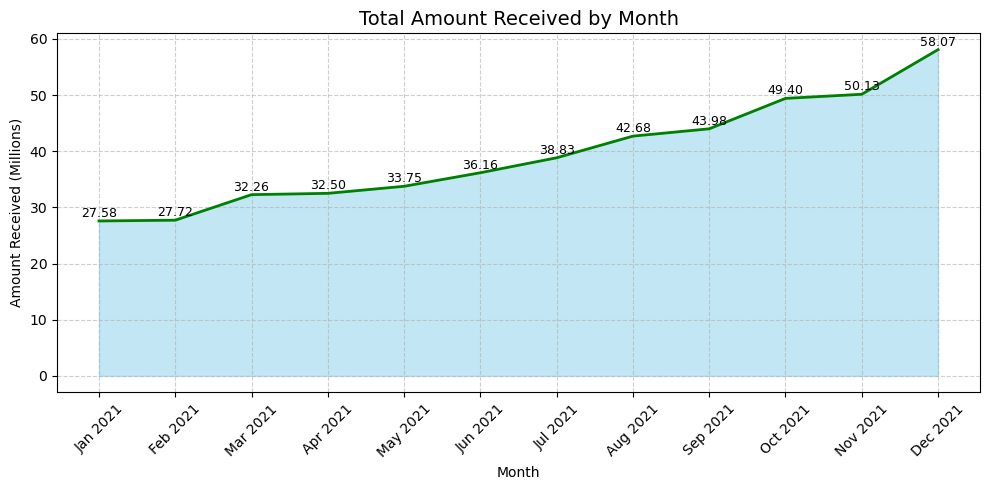

In [10]:
Monthly_Received_Amount = (df.sort_values('issue_date').assign(month_year=lambda x: x['issue_date'].dt.strftime('%b %Y'))
                         .groupby('month_year',sort=False)['total_payment'].sum().div(1000000).reset_index(name='amount_received'))

plt.figure(figsize=(10,5))
plt.fill_between(Monthly_Received_Amount['month_year'],Monthly_Received_Amount['amount_received'],color='skyblue',alpha=0.5)
plt.plot(Monthly_Received_Amount['month_year'],Monthly_Received_Amount['amount_received'],color='green',linewidth=2)

for i,row in Monthly_Received_Amount.iterrows():
    plt.text(i,row['amount_received']+0.2, f"{row['amount_received']:.2f}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')

plt.title('Total Amount Received by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Amount Received (Millions)')
plt.xticks(ticks=range(len(Monthly_Received_Amount)),labels=Monthly_Funded_Amount['month_year'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date for Total Loan Applications

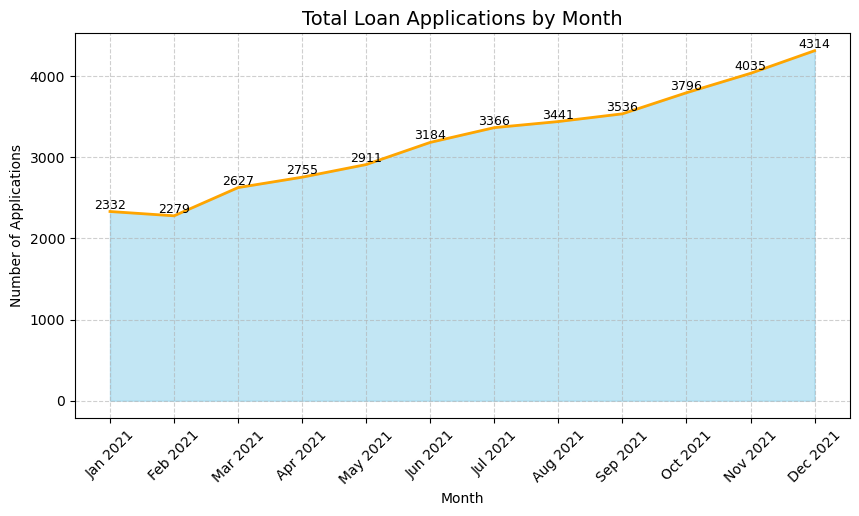

In [16]:
Monthly_Loan_Applications = (df.sort_values('issue_date').assign(month_year=lambda x: x['issue_date'].dt.strftime('%b %Y'))
                         .groupby('month_year',sort=False)['id'].count().reset_index(name='loan_applications_count'))

plt.figure(figsize=(10,5))
plt.fill_between(Monthly_Loan_Applications['month_year'],Monthly_Loan_Applications['loan_applications_count'],color='skyblue',alpha=0.5)
plt.plot(Monthly_Loan_Applications['month_year'],Monthly_Loan_Applications['loan_applications_count'],color='orange',linewidth=2)

for i,row in Monthly_Loan_Applications.iterrows():
    plt.text(i,row['loan_applications_count']+0.2, f"{row['loan_applications_count']}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')

plt.title('Total Loan Applications by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(Monthly_Loan_Applications)),labels=Monthly_Loan_Applications['month_year'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()